This ipynb is basically for Ebay Tech Devices Analysis.

You can upload and explore **all csv relared to this project** . Like for Mobile, Watch etc.

Most of the functionality are same but for diffrent circumstances you need to change manually.

importing relevent library

In [63]:
## importing relevent library

import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objects as go

reading the csv dataset

In [112]:
## you can try different dataset

df = pd.read_csv('Watch1.csv')

In [65]:
df.head()

,Title,Price,Rating,Sold
0,NaN,68.95,6.326323e+06,135.0
1,Mens Dual Time Flywheel Automatic Mechanical W...,59.94,1.692040e+05,134.0
2,Invicta Men's 32632 Specialty Mechanical 3 Han...,49.99,1.751720e+07,3544.0
3,Invicta Men's Watch Pro Diver Blue Dial Quartz...,78.99,2.277471e+09,621.0
4,Invicta Men's Watch Aviator Chronograph Gunmet...,48.98,6.224140e+05,617.0


showing different statistical characteristics of data

In [66]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 257 entries, 0 to 256
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Title   251 non-null    object 
 1   Price   256 non-null    object 
 2   Rating  40 non-null     float64
 3   Sold    46 non-null     float64
dtypes: float64(2), object(2)
memory usage: 8.2+ KB


In [67]:
df.describe()

,Rating,Sold
count,4.000000e+01,46.000000
mean,2.601154e+16,197.086957
std,1.643930e+17,555.147781
min,1.231300e+04,4.000000
25%,7.826530e+05,16.500000
50%,1.542978e+07,30.000000
75%,7.601275e+08,121.000000
max,1.039731e+18,3544.000000


showing null value present in the dataset

In [68]:
df.isna().sum()

Title       6
Price       1
Rating    217
Sold      211
dtype: int64

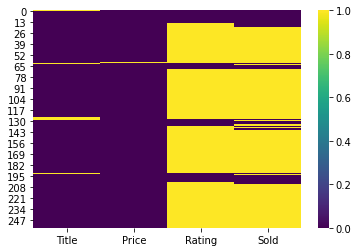

In [69]:
#graphically
sns.heatmap(df.isnull(), cmap='viridis')

to see how many columns present 

In [70]:
df.columns

Index(['Title', 'Price', 'Rating', 'Sold'], dtype='object')

Try to open the cvs in the system and explore different features .

It may contain different data type like string, float ,missing values etc.

In [71]:
df.head()

,Title,Price,Rating,Sold
0,NaN,68.95,6.326323e+06,135.0
1,Mens Dual Time Flywheel Automatic Mechanical W...,59.94,1.692040e+05,134.0
2,Invicta Men's 32632 Specialty Mechanical 3 Han...,49.99,1.751720e+07,3544.0
3,Invicta Men's Watch Pro Diver Blue Dial Quartz...,78.99,2.277471e+09,621.0
4,Invicta Men's Watch Aviator Chronograph Gunmet...,48.98,6.224140e+05,617.0


some features contains string inside numeric values .

so need to remove them ***manually*** before applying it to a model 

In [113]:
### try to do it manually many dataset may not contains special characters and may contain other features.

df['Price'] = np.where((df.Price == '189.98 to $225.98'),225.98,df.Price)
df['Price'] = np.where((df.Price == '175.98 to $238.98'),238.98,df.Price)
df['Price'] = np.where((df.Price == '115.98 to $118.98'),120.00,df.Price)
df['Price'] = np.where((df.Price == '458.98 to $469.98'),469.98,df.Price)
df['Price'] = np.where((df.Price == '159.99 to $189.99'),189.99,df.Price)
df['Price'] = np.where((df.Price == '379.95 to $419.95'),419.95,df.Price)
df['Price'] = np.where((df.Price == '235.98 to $298.98'),298.98,df.Price)
df['Price'] = np.where((df.Price == '8.99 to $9.99'),9.99,df.Price)
df['Price'] = np.where((df.Price == '189.98 to $239.98'),239.98,df.Price)
df

,Title,Price,Rating,Sold
0,NaN,68.95,6.326323e+06,135.0
1,Mens Dual Time Flywheel Automatic Mechanical W...,59.94,1.692040e+05,134.0
2,Invicta Men's 32632 Specialty Mechanical 3 Han...,49.99,1.751720e+07,3544.0
3,Invicta Men's Watch Pro Diver Blue Dial Quartz...,78.99,2.277471e+09,621.0
4,Invicta Men's Watch Aviator Chronograph Gunmet...,48.98,6.224140e+05,617.0
...,...,...,...,...
252,Victorinox Swiss Army Men's Watch I.N.O.X. Blu...,369.98,NaN,NaN
253,New ListingNixon Women's Watch Kensington Quar...,80.00,NaN,NaN
254,New ListingVintage Gold & Black Chanel Premier...,"1,395.00",NaN,NaN
255,Mens Silver Automatic Mechanical Watch White D...,118.95,NaN,NaN


some values in the Price contains commas and special character removing them .

In [73]:
df["Price"] = [float(str(i).replace(",", "")) for i in df["Price"]]
df['Price'] = df['Price'].replace("$","", regex=True).astype(float)

finding the Nan values with the mean ..

In [74]:
def get_mean(a):
  mean_value = a.mean()
  print('mean value :',mean_value)

  a.fillna(value=mean_value, inplace=True)
  print('mean value filled in place of nan ' ,a)

In [75]:
##for price
get_mean(df['Price'])

mean value : 1451.0104687499995
mean value filled in place of nan  0        68.95
1        59.94
2        49.99
3        78.99
4        48.98
        ...   
252     369.98
253      80.00
254    1395.00
255     118.95
256      84.99
Name: Price, Length: 257, dtype: float64


visualization ...

In [76]:
def feature_show(a):
  fig = go.Figure(data=go.Bar(y=a))
  fig.show()

In [77]:
## for price
feature_show(df['Price'])

For Rating

In [78]:
df['Rating'].unique()


array([6.32632300e+06, 1.69204000e+05, 1.75172040e+07, 2.27747115e+09,
       6.22414000e+05, 3.52650000e+06, 6.43051000e+05, 1.20321032e+09,
       8.29187000e+05, 1.82961000e+05, 1.29186000e+05, 1.33894200e+06,
       1.23130000e+04, 1.24255520e+07, 5.01174111e+09,            nan,
       4.23535300e+06, 7.21030422e+14, 2.24764000e+05, 1.03973113e+18,
       1.45810622e+09, 9.20084012e+12, 2.11427036e+08, 2.21490500e+07,
       5.51585440e+07, 3.77471762e+08, 5.26180000e+04, 3.22141822e+10,
       1.33423540e+07, 1.10402000e+05, 1.23513500e+07, 2.73747176e+09,
       2.11378518e+08, 4.17747176e+09, 1.11662240e+08, 2.29761540e+07,
       1.76572000e+06, 6.12433210e+08, 2.32417241e+08])

In [79]:
df['Rating'].isna().sum()

217

In [80]:
get_mean(df['Rating'])

mean value : 2.6011535367252904e+16
mean value filled in place of nan  0      6.326323e+06
1      1.692040e+05
2      1.751720e+07
3      2.277471e+09
4      6.224140e+05
           ...     
252    2.601154e+16
253    2.601154e+16
254    2.601154e+16
255    2.601154e+16
256    2.601154e+16
Name: Rating, Length: 257, dtype: float64


In [81]:
feature_show(df['Rating'])

For Sold

In [82]:
df['Sold'].isna().sum()

211

In [83]:
df['Sold'].unique()

array([ 135.,  134., 3544.,  621.,  617.,   88.,  188.,  168.,   52.,
        136.,   10.,   25.,   46.,   41., 1255.,  105.,   42.,   62.,
         nan,   24.,   22.,  124.,   28.,   18.,   26.,  108.,   31.,
         29.,  112.,   12.,    4.,   27.,   16.,   15.,  368.,    5.,
        647.])

In [84]:
get_mean(df['Sold'])

mean value : 197.08695652173913
mean value filled in place of nan  0       135.000000
1       134.000000
2      3544.000000
3       621.000000
4       617.000000
          ...     
252     197.086957
253     197.086957
254     197.086957
255     197.086957
256     197.086957
Name: Sold, Length: 257, dtype: float64


In [85]:
df['Sold'] = df['Sold'].astype(int)

In [86]:
feature_show(df['Sold'])

For Title

In [87]:
df['Title'].isna().sum()

6

In [88]:
df['Title'].unique()

array([nan,
       'Mens Dual Time Flywheel Automatic Mechanical Watch Rose Gold White Dial Brown ',
       "Invicta Men's 32632 Specialty Mechanical 3 Hand Black Dial Watch",
       "Invicta Men's Watch Pro Diver Blue Dial Quartz Dive Silver Tone Bracelet 9204OB",
       "Invicta Men's Watch Aviator Chronograph Gunmetal Dial Steel Bracelet 17204",
       "One Hand Luch Mechanical Wristwatch Men's leather Vintage White 77471146 RUS",
       "Invicta Men's Pro Diver Gold-Tone Quartz Black Dial Stainless Steel Watch 22414",
       "New ListingRAYMOND WEIL - Swiss Quarts Men's Watch  ",
       'New ListingBulova Automatic Watch',
       "Timex Men's Watch Command Digital Black Dial Orange Rubber Strap TW5M26500",
       'New Listing#1 MENSWEAR Tissot 1853 T063639A Traditional Silver Black Dial Wristwatch Watch',
       'New ListingMens or Ladies Tag Heuer 2000 18K Gold plate & SS Professional watch - Gold Dial',
       'New ListingVintage Helbros Two-Tone Black-Dial womens quartz watch  '

In [89]:
## to fill NaNs with the most frequent value from one column

df['Title'] = df['Title'].fillna(df['Title'].value_counts().index[0])

In [90]:
feature_show(df['Title'])

now all together 

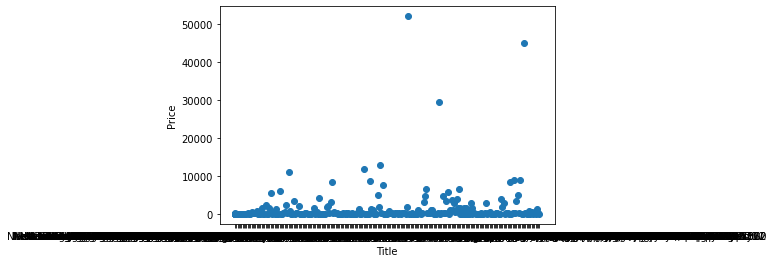

In [91]:
## Title vs Price
x = df.Title
y = df.Price
plt.xlabel('Title')
plt.ylabel('Price')
plt.scatter(x,y)

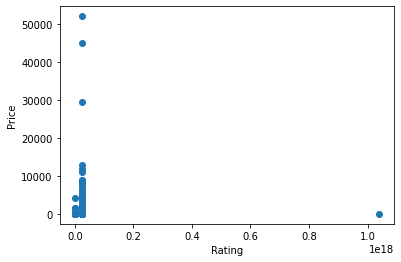

In [92]:
## Rating vs Price
x = df.Rating
y = df.Price
plt.xlabel('Rating')
plt.ylabel('Price')
plt.scatter(x,y)

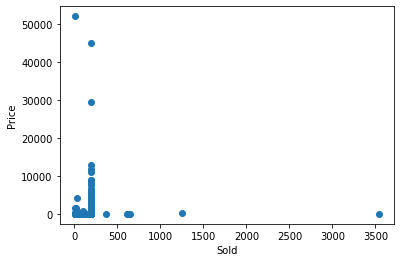

In [93]:
## sold vs Price 
x = df.Sold
y = df.Price
plt.xlabel('Sold')
plt.ylabel('Price')
plt.scatter(x,y)

In [94]:
## how many unique category present for a feature

len(df['Title'].unique())

240

As Title contains catecogical feature model will not understand that .

So doing one hot encoding to make it numeric. But as we have many categories of a same feature this will lead to accuracy issue for the model.

So taking the top 20 mose frequent featurers for model prediction

In [95]:
### getting the to 20 most frequent category for the variable Title

df.Title.value_counts().sort_values(ascending=False).head(20)

New ListingVintage Duval Swiss manual wind date Watch Working                                  8
Mens Automatic Mechanical Watch Date Day Silver White Blue Leather Deployant                   2
New ListingOMEGA SPEEDMASTER 3513.50 AUTOMATIC CHRONOGRAPH BLACK MENS STEEL DATE WATCH         2
New ListingSEIKO KINETIC Automatic Quartz Mens Stainless Steel Wristwatch 5M62-OCXO            2
New Baume & Mercier Clifton Automatic Limited Edition Indian Men's Watch 10402                 2
New ListingFossil NIT MENS New RUNNING WATCH FS-2445                                           2
Invicta Men's Watch Speedway Chronograph Quartz Diver Stainless Bracelet 17023                 2
New ListingVTG Seiko 5Y30-7009 Men Ultra Thin Gold Tone Analog Quartz Watch Hour~New Batter    2
New Listing$3750 DAVID YURMAN 14K GOLD CASE , SS CABLE WATCH                                   2
New ListingHamilton LL Bean Vintage 24hr Military Pilot/Field Watch 9931 Swiss 7j ETA 955      2
New ListingTen Beats Men Lady 

In [96]:
## making a list with top 20 categories of a variable 

top_20 = [ x for x in df.Title.value_counts().sort_values(ascending=False).head(20).index]
top_20

['New ListingVintage Duval Swiss manual wind date Watch Working',
 'Mens Automatic Mechanical Watch Date Day Silver White Blue Leather Deployant',
 'New ListingOMEGA SPEEDMASTER 3513.50 AUTOMATIC CHRONOGRAPH BLACK MENS STEEL DATE WATCH',
 'New ListingSEIKO KINETIC Automatic Quartz Mens Stainless Steel Wristwatch 5M62-OCXO',
 "New Baume & Mercier Clifton Automatic Limited Edition Indian Men's Watch 10402",
 'New ListingFossil NIT MENS New RUNNING WATCH FS-2445',
 "Invicta Men's Watch Speedway Chronograph Quartz Diver Stainless Bracelet 17023",
 'New ListingVTG Seiko 5Y30-7009 Men Ultra Thin Gold Tone Analog Quartz Watch Hour~New Batter',
 'New Listing$3750 DAVID YURMAN 14K GOLD CASE , SS CABLE WATCH ',
 'New ListingHamilton LL Bean Vintage 24hr Military Pilot/Field Watch 9931 Swiss 7j ETA 955',
 'New ListingTen Beats Men Lady 30m Green Black Rubber Analog Quartz Watch Hours~New Battery',
 "New ListingRADO DIASTAR DAY DATE SEALED AUTOMATIC MEN'S EXCELLENT WRIST WATCH.",
 'New ListingFERO

In [97]:
## making 20 binary variables for that categories

for label in top_20:
  df[label]=np.where(df['Title'] == label, 1, 0)

df1 = df[['Title'] + top_20]

In [98]:
df1.drop('Title',axis=1,inplace=True)

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4174: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [99]:
df1.shape

(257, 20)

In [100]:
new_df=pd.concat([df1,df],axis=1)

In [101]:
new_df.head(2)

,New ListingVintage Duval Swiss manual wind date Watch Working,Mens Automatic Mechanical Watch Date Day Silver White Blue Leather Deployant,New ListingOMEGA SPEEDMASTER 3513.50 AUTOMATIC CHRONOGRAPH BLACK MENS STEEL DATE WATCH,New ListingSEIKO KINETIC Automatic Quartz Mens Stainless Steel Wristwatch 5M62-OCXO,New Baume & Mercier Clifton Automatic Limited Edition Indian Men's Watch 10402,New ListingFossil NIT MENS New RUNNING WATCH FS-2445,Invicta Men's Watch Speedway Chronograph Quartz Diver Stainless Bracelet 17023,New ListingVTG Seiko 5Y30-7009 Men Ultra Thin Gold Tone Analog Quartz Watch Hour~New Batter,"New Listing$3750 DAVID YURMAN 14K GOLD CASE , SS CABLE WATCH",New ListingHamilton LL Bean Vintage 24hr Military Pilot/Field Watch 9931 Swiss 7j ETA 955,New ListingTen Beats Men Lady 30m Green Black Rubber Analog Quartz Watch Hours~New Battery,New ListingRADO DIASTAR DAY DATE SEALED AUTOMATIC MEN'S EXCELLENT WRIST WATCH.,New ListingFERO FEIDMANN 17J GOLD TONE BLUE CLOISONNE 22mm BALL PENDANT WATCH - RUNS,New ListingVintage NINE WEST Black-Dial Silver-Tone Case Women's Watch,New ListingCitizen Diamond Accent Eco Drive Date Watch Gold Tone,Mens Silver Bridge Manual Mechanical Watch - Stainless Steel DIASTERIA 1688W,GENUINE SEIKO (SII) NH35/NH35A AUTOMATIC WATCH MOVEMENT DATE 3 W/WHITE DATE NEW,"AXEL QUARTZ watch, silver bracelet green face",New ListingZenith Defy Automatic,Mens Automatic Mechanical Date Watch Silver White Dial Blue Leather Deployant,Title,Price,Rating,Sold,New ListingVintage Duval Swiss manual wind date Watch Working,Mens Automatic Mechanical Watch Date Day Silver White Blue Leather Deployant,New ListingOMEGA SPEEDMASTER 3513.50 AUTOMATIC CHRONOGRAPH BLACK MENS STEEL DATE WATCH,New ListingSEIKO KINETIC Automatic Quartz Mens Stainless Steel Wristwatch 5M62-OCXO,New Baume & Mercier Clifton Automatic Limited Edition Indian Men's Watch 10402,New ListingFossil NIT MENS New RUNNING WATCH FS-2445,Invicta Men's Watch Speedway Chronograph Quartz Diver Stainless Bracelet 17023,New ListingVTG Seiko 5Y30-7009 Men Ultra Thin Gold Tone Analog Quartz Watch Hour~New Batter,"New Listing$3750 DAVID YURMAN 14K GOLD CASE , SS CABLE WATCH",New ListingHamilton LL Bean Vintage 24hr Military Pilot/Field Watch 9931 Swiss 7j ETA 955,New ListingTen Beats Men Lady 30m Green Black Rubber Analog Quartz Watch Hours~New Battery,New ListingRADO DIASTAR DAY DATE SEALED AUTOMATIC MEN'S EXCELLENT WRIST WATCH.,New ListingFERO FEIDMANN 17J GOLD TONE BLUE CLOISONNE 22mm BALL PENDANT WATCH - RUNS,New ListingVintage NINE WEST Black-Dial Silver-Tone Case Women's Watch,New ListingCitizen Diamond Accent Eco Drive Date Watch Gold Tone,Mens Silver Bridge Manual Mechanical Watch - Stainless Steel DIASTERIA 1688W,GENUINE SEIKO (SII) NH35/NH35A AUTOMATIC WATCH MOVEMENT DATE 3 W/WHITE DATE NEW,"AXEL QUARTZ watch, silver bracelet green face",New ListingZenith Defy Automatic,Mens Automatic Mechanical Date Watch Silver White Dial Blue Leather Deployant
0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,New ListingVintage Duval Swiss manual wind dat...,68.95,6326323.0,135,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,Mens Dual Time Flywheel Automatic Mechanical W...,59.94,169204.0,134,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [102]:
y=new_df['Price']
y.head()

0    68.95
1    59.94
2    49.99
3    78.99
4    48.98
Name: Price, dtype: float64

In [103]:
new_df.drop('Price',axis=1,inplace=True)

In [104]:
new_df.drop('Title',axis=1,inplace=True)

In [105]:
x=new_df
x.tail()

,New ListingVintage Duval Swiss manual wind date Watch Working,Mens Automatic Mechanical Watch Date Day Silver White Blue Leather Deployant,New ListingOMEGA SPEEDMASTER 3513.50 AUTOMATIC CHRONOGRAPH BLACK MENS STEEL DATE WATCH,New ListingSEIKO KINETIC Automatic Quartz Mens Stainless Steel Wristwatch 5M62-OCXO,New Baume & Mercier Clifton Automatic Limited Edition Indian Men's Watch 10402,New ListingFossil NIT MENS New RUNNING WATCH FS-2445,Invicta Men's Watch Speedway Chronograph Quartz Diver Stainless Bracelet 17023,New ListingVTG Seiko 5Y30-7009 Men Ultra Thin Gold Tone Analog Quartz Watch Hour~New Batter,"New Listing$3750 DAVID YURMAN 14K GOLD CASE , SS CABLE WATCH",New ListingHamilton LL Bean Vintage 24hr Military Pilot/Field Watch 9931 Swiss 7j ETA 955,New ListingTen Beats Men Lady 30m Green Black Rubber Analog Quartz Watch Hours~New Battery,New ListingRADO DIASTAR DAY DATE SEALED AUTOMATIC MEN'S EXCELLENT WRIST WATCH.,New ListingFERO FEIDMANN 17J GOLD TONE BLUE CLOISONNE 22mm BALL PENDANT WATCH - RUNS,New ListingVintage NINE WEST Black-Dial Silver-Tone Case Women's Watch,New ListingCitizen Diamond Accent Eco Drive Date Watch Gold Tone,Mens Silver Bridge Manual Mechanical Watch - Stainless Steel DIASTERIA 1688W,GENUINE SEIKO (SII) NH35/NH35A AUTOMATIC WATCH MOVEMENT DATE 3 W/WHITE DATE NEW,"AXEL QUARTZ watch, silver bracelet green face",New ListingZenith Defy Automatic,Mens Automatic Mechanical Date Watch Silver White Dial Blue Leather Deployant,Rating,Sold,New ListingVintage Duval Swiss manual wind date Watch Working,Mens Automatic Mechanical Watch Date Day Silver White Blue Leather Deployant,New ListingOMEGA SPEEDMASTER 3513.50 AUTOMATIC CHRONOGRAPH BLACK MENS STEEL DATE WATCH,New ListingSEIKO KINETIC Automatic Quartz Mens Stainless Steel Wristwatch 5M62-OCXO,New Baume & Mercier Clifton Automatic Limited Edition Indian Men's Watch 10402,New ListingFossil NIT MENS New RUNNING WATCH FS-2445,Invicta Men's Watch Speedway Chronograph Quartz Diver Stainless Bracelet 17023,New ListingVTG Seiko 5Y30-7009 Men Ultra Thin Gold Tone Analog Quartz Watch Hour~New Batter,"New Listing$3750 DAVID YURMAN 14K GOLD CASE , SS CABLE WATCH",New ListingHamilton LL Bean Vintage 24hr Military Pilot/Field Watch 9931 Swiss 7j ETA 955,New ListingTen Beats Men Lady 30m Green Black Rubber Analog Quartz Watch Hours~New Battery,New ListingRADO DIASTAR DAY DATE SEALED AUTOMATIC MEN'S EXCELLENT WRIST WATCH.,New ListingFERO FEIDMANN 17J GOLD TONE BLUE CLOISONNE 22mm BALL PENDANT WATCH - RUNS,New ListingVintage NINE WEST Black-Dial Silver-Tone Case Women's Watch,New ListingCitizen Diamond Accent Eco Drive Date Watch Gold Tone,Mens Silver Bridge Manual Mechanical Watch - Stainless Steel DIASTERIA 1688W,GENUINE SEIKO (SII) NH35/NH35A AUTOMATIC WATCH MOVEMENT DATE 3 W/WHITE DATE NEW,"AXEL QUARTZ watch, silver bracelet green face",New ListingZenith Defy Automatic,Mens Automatic Mechanical Date Watch Silver White Dial Blue Leather Deployant
252,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2.601154e+16,197,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
253,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2.601154e+16,197,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
254,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2.601154e+16,197,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
255,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2.601154e+16,197,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
256,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2.601154e+16,197,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


Making model

In [106]:
from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.05)

In [107]:
from sklearn.linear_model import LinearRegression
regression=LinearRegression()

regression.fit(x_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [108]:
y_pred=regression.predict(x_test)

In [109]:
x_test

,New ListingVintage Duval Swiss manual wind date Watch Working,Mens Automatic Mechanical Watch Date Day Silver White Blue Leather Deployant,New ListingOMEGA SPEEDMASTER 3513.50 AUTOMATIC CHRONOGRAPH BLACK MENS STEEL DATE WATCH,New ListingSEIKO KINETIC Automatic Quartz Mens Stainless Steel Wristwatch 5M62-OCXO,New Baume & Mercier Clifton Automatic Limited Edition Indian Men's Watch 10402,New ListingFossil NIT MENS New RUNNING WATCH FS-2445,Invicta Men's Watch Speedway Chronograph Quartz Diver Stainless Bracelet 17023,New ListingVTG Seiko 5Y30-7009 Men Ultra Thin Gold Tone Analog Quartz Watch Hour~New Batter,"New Listing$3750 DAVID YURMAN 14K GOLD CASE , SS CABLE WATCH",New ListingHamilton LL Bean Vintage 24hr Military Pilot/Field Watch 9931 Swiss 7j ETA 955,New ListingTen Beats Men Lady 30m Green Black Rubber Analog Quartz Watch Hours~New Battery,New ListingRADO DIASTAR DAY DATE SEALED AUTOMATIC MEN'S EXCELLENT WRIST WATCH.,New ListingFERO FEIDMANN 17J GOLD TONE BLUE CLOISONNE 22mm BALL PENDANT WATCH - RUNS,New ListingVintage NINE WEST Black-Dial Silver-Tone Case Women's Watch,New ListingCitizen Diamond Accent Eco Drive Date Watch Gold Tone,Mens Silver Bridge Manual Mechanical Watch - Stainless Steel DIASTERIA 1688W,GENUINE SEIKO (SII) NH35/NH35A AUTOMATIC WATCH MOVEMENT DATE 3 W/WHITE DATE NEW,"AXEL QUARTZ watch, silver bracelet green face",New ListingZenith Defy Automatic,Mens Automatic Mechanical Date Watch Silver White Dial Blue Leather Deployant,Rating,Sold,New ListingVintage Duval Swiss manual wind date Watch Working,Mens Automatic Mechanical Watch Date Day Silver White Blue Leather Deployant,New ListingOMEGA SPEEDMASTER 3513.50 AUTOMATIC CHRONOGRAPH BLACK MENS STEEL DATE WATCH,New ListingSEIKO KINETIC Automatic Quartz Mens Stainless Steel Wristwatch 5M62-OCXO,New Baume & Mercier Clifton Automatic Limited Edition Indian Men's Watch 10402,New ListingFossil NIT MENS New RUNNING WATCH FS-2445,Invicta Men's Watch Speedway Chronograph Quartz Diver Stainless Bracelet 17023,New ListingVTG Seiko 5Y30-7009 Men Ultra Thin Gold Tone Analog Quartz Watch Hour~New Batter,"New Listing$3750 DAVID YURMAN 14K GOLD CASE , SS CABLE WATCH",New ListingHamilton LL Bean Vintage 24hr Military Pilot/Field Watch 9931 Swiss 7j ETA 955,New ListingTen Beats Men Lady 30m Green Black Rubber Analog Quartz Watch Hours~New Battery,New ListingRADO DIASTAR DAY DATE SEALED AUTOMATIC MEN'S EXCELLENT WRIST WATCH.,New ListingFERO FEIDMANN 17J GOLD TONE BLUE CLOISONNE 22mm BALL PENDANT WATCH - RUNS,New ListingVintage NINE WEST Black-Dial Silver-Tone Case Women's Watch,New ListingCitizen Diamond Accent Eco Drive Date Watch Gold Tone,Mens Silver Bridge Manual Mechanical Watch - Stainless Steel DIASTERIA 1688W,GENUINE SEIKO (SII) NH35/NH35A AUTOMATIC WATCH MOVEMENT DATE 3 W/WHITE DATE NEW,"AXEL QUARTZ watch, silver bracelet green face",New ListingZenith Defy Automatic,Mens Automatic Mechanical Date Watch Silver White Dial Blue Leather Deployant
47,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2.601154e+16,197,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
40,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2.601154e+16,197,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
237,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2.601154e+16,197,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
131,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3.774718e+08,31,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
176,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2.601154e+16,197,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
178,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2.601154e+16,197,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
92,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2.601154e+16,197,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
76,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2.601154e+16,197,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
35,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2.601154e+16,197,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
248,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2.601154e+16,197,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [110]:
## for predicting a value .. change the value with comma for different observation

y_pred_1=regression.predict([[0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	1.338942e+06,	25,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0]])

In [111]:
## so you can see a predicted value for a particular data

y_pred_1

array([1603.86740854])